In [1]:
import billboard as bb
import pandas as pd
import spotipy

## Spotify secrets

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
# did this work? commenting out so secrets are safe
# print(os.getenv('SPOTIFY_CLIENT_ID'))
# print(os.getenv('SPOTIFY_CLIENT_SECRET'))

True

In [23]:
client_id  = os.getenv('SPOTIFY_CLIENT_ID')
client_secret  = os.getenv('SPOTIFY_CLIENT_SECRET')

# Deciding which billboard chart to use

In [4]:
# bb.charts()

In [5]:
top_100 = bb.ChartData('hot-100')
# print(chart1)

In [6]:
top_100_songs = top_100[0].title
top_100_songs

'Leave The Door Open'

# Starting with year end top 100 data chart for 2020. 
I want to go small and later adding in more details.

In [7]:
# bb.charts(year_end=True)

In [8]:
yearend2020 = bb.ChartData('hot-100-songs',year=2020)
yearend2020

billboard.ChartData('hot-100-songs', year='2020')

In [9]:
# print(yearend2020)

Billboard 2020 Year End Hot 100 playlist:
https://open.spotify.com/playlist/1WBljFutuk7uLQtfqfmjWV?si=421973dd4721421f

### From Spotipy documentation:

In [27]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id,client_secret)
spotify = spotipy.Spotify(auth_manager = auth_manager)

In [30]:
# Example to check if it's working
# birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'

# results = spotify.artist_albums(birdy_uri, album_type='album')
# albums = results['items']
# while results['next']:
#     results = spotify.next(results)
#     albums.extend(results['items'])

# for album in albums:
#     print(album['name'])

### The Top 100 Songs from 2020 (user playlist verified against Billboard data)

In [41]:
hot100_2020_url =  'https://open.spotify.com/playlist/1WBljFutuk7uLQtfqfmjWV?si=421973dd4721421f'
tracks = spotify.playlist_tracks(hot100_2020_url,limit=100)

### Extracting id or url to run audio_features

In [114]:
num_1 = pd.DataFrame(pd.DataFrame.from_dict(tracks,orient='columns')['items'][0])['track']['id']
num_1 # this is messy, let's try something else

'0sf12qNH5qcw8qpgymFOqD'

In [60]:
# audio features for Blinding Lights
spotify.audio_features(tracks=num_1)

[{'danceability': 0.513,
  'energy': 0.796,
  'key': 1,
  'loudness': -4.075,
  'mode': 1,
  'speechiness': 0.0629,
  'acousticness': 0.00147,
  'instrumentalness': 0.000209,
  'liveness': 0.0938,
  'valence': 0.345,
  'tempo': 171.017,
  'type': 'audio_features',
  'id': '0sf12qNH5qcw8qpgymFOqD',
  'uri': 'spotify:track:0sf12qNH5qcw8qpgymFOqD',
  'track_href': 'https://api.spotify.com/v1/tracks/0sf12qNH5qcw8qpgymFOqD',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0sf12qNH5qcw8qpgymFOqD',
  'duration_ms': 201573,
  'time_signature': 4}]

In [107]:
#audio features can use uri, url, or id with a max of 100
def getList(dict):
    return dict.keys()

print(getList(tracks))

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


In [124]:
type(tracks.get('items')[0])
type(tracks.get('items')[0])

dict

In [125]:
print(getList(tracks.get('items')[0]))

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])


In [127]:
type(tracks.get('items')[0].get('track'))

dict

In [128]:
print(getList(tracks.get('items')[0].get('track')))

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])


In [134]:
tracks.get('items')[0].get('track')['id']

'0sf12qNH5qcw8qpgymFOqD'

<code>Tracks</code> is a dictionary of lists made up of a dictonary of dictionaries. Writing a function to give us a list of ids which can then be run through <code>audio_features</code>

In [143]:
ids = []

for i in range(0,100):
    id = tracks.get('items')[i].get('track')['id']
    ids.append(id)

In [152]:
len(ids)

100

In [156]:
audio_features = pd.DataFrame.from_dict(spotify.audio_features(tracks=ids))
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
1,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,audio_features,21jGcNKet2qwijlDFuPiPb,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4
2,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
3,0.794,0.793,11,-4.521,0,0.0842,0.01250,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
4,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E47368C3D0>]],
      dtype=object)

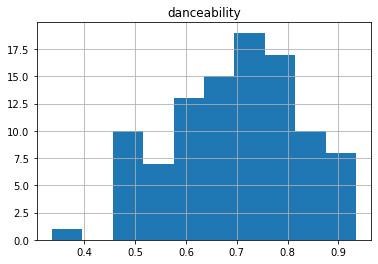

In [157]:
audio_features.hist('danceability')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E478AF7640>]],
      dtype=object)

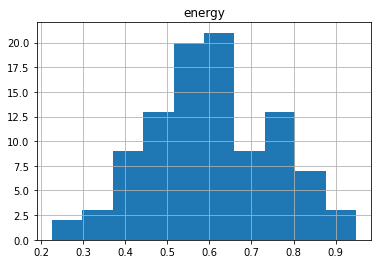

In [158]:
audio_features.hist('energy')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E478B96BB0>]],
      dtype=object)

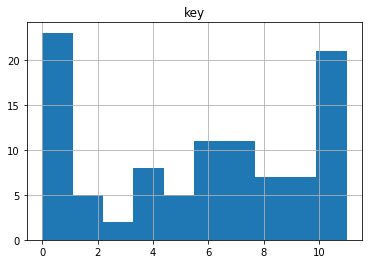

In [159]:
audio_features.hist('key')